# Uploading images to huggingface

In [1]:
from dotenv import load_dotenv
import pandas as pd
from PIL import Image
import random
import os

load_dotenv()

True

In [2]:
# from huggingface_hub import login
# login(token=os.environ["token"])

In [ ]:
image_folder = 'images/test_data_v2'

all_images = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

sampled_images = random.sample(all_images, min(500, len(all_images)))

df = pd.DataFrame({
    "filename": sampled_images,
    "filepath": [os.path.join(image_folder, img) for img in sampled_images]
})

df["image"] = df["filepath"].apply(lambda x: Image.open(x))

df

,filename,filepath,image
0,d1d7c7863ee449f197b243a519ad12df.jpg,images/test_data_v2/d1d7c7863ee449f197b243a519...,<PIL.JpegImagePlugin.JpegImageFile image mode=...
1,34c8045286374bb992162f3a0e9e1f45.jpg,images/test_data_v2/34c8045286374bb992162f3a0e...,<PIL.JpegImagePlugin.JpegImageFile image mode=...
2,b0c0323f9e2c404b957afd25a86e036e.jpg,images/test_data_v2/b0c0323f9e2c404b957afd25a8...,<PIL.PngImagePlugin.PngImageFile image mode=RG...
3,d2538cb6a3e54f4db6b96cdfbfc81471.jpg,images/test_data_v2/d2538cb6a3e54f4db6b96cdfbf...,<PIL.PngImagePlugin.PngImageFile image mode=RG...
4,252ac9f5829044fdb5d9ef0f8941865d.jpg,images/test_data_v2/252ac9f5829044fdb5d9ef0f89...,<PIL.PngImagePlugin.PngImageFile image mode=RG...
...,...,...,...
495,b56f67a7af114462bb0447fb5338f4a5.jpg,images/test_data_v2/b56f67a7af114462bb0447fb53...,<PIL.PngImagePlugin.PngImageFile image mode=RG...
496,9bc69d450ce34cbbb76fe85895518c0a.jpg,images/test_data_v2/9bc69d450ce34cbbb76fe85895...,<PIL.JpegImagePlugin.JpegImageFile image mode=...
497,150f625ccc924e8894e656260aa082d7.jpg,images/test_data_v2/150f625ccc924e8894e656260a...,<PIL.JpegImagePlugin.JpegImageFile image mode=...
498,6883bf1ead9747e9ac74a775f5cdca8b.jpg,images/test_data_v2/6883bf1ead9747e9ac74a775f5...,<PIL.PngImagePlugin.PngImageFile image mode=RG...


In [4]:
df.to_csv("images/image.csv")

In [23]:
# Move the pictures used
import shutil

dest = "images/used/"
os.makedirs(dest, exist_ok=True)

for file in df["filepath"]:
    if os.path.exists(file):
        shutil.copy(file, dest)

In [1]:
import os
# import faiss
import torch
# import skimage
# import requests
# import pinecone
import numpy as np
import pandas as pd
from PIL import Image
from io import BytesIO
import IPython.display
import matplotlib.pyplot as plt
# from datasets import load_dataset
from collections import OrderedDict
from transformers import CLIPProcessor, CLIPModel, CLIPTokenizer

/home/fisokuhle/Desktop/multi-modal_image_retrieval_system/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def get_model_info(model_ID, device):
# Save the model to device
	model = CLIPModel.from_pretrained(model_ID).to(device)
 	# Get the processor
	processor = CLIPProcessor.from_pretrained(model_ID)
# Get the tokenizer
	tokenizer = CLIPTokenizer.from_pretrained(model_ID)
       # Return model, processor & tokenizer
	return model, processor, tokenizer
# Set the device
device = "cuda" if torch.cuda.is_available() else "cpu"
# Define the model ID
model_ID = "openai/clip-vit-base-patch32"
# Get model, processor & tokenizer
model, processor, tokenizer = get_model_info(model_ID, device)

In [3]:
def get_single_text_embedding(text): 
    inputs = tokenizer(text, return_tensors = "pt")
    text_embeddings = model.get_text_features(**inputs)
 	# convert the embeddings to numpy array
    embedding_as_np = text_embeddings.cpu().detach().numpy()

    return embedding_as_np

In [4]:
df = pd.read_csv("images/image.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
df["image"] = df["filepath"].apply(lambda x: Image.open(x))
df

,filename,filepath,image
0,d1d7c7863ee449f197b243a519ad12df.jpg,images/test_data_v2/d1d7c7863ee449f197b243a519...,<PIL.JpegImagePlugin.JpegImageFile image mode=...
1,34c8045286374bb992162f3a0e9e1f45.jpg,images/test_data_v2/34c8045286374bb992162f3a0e...,<PIL.JpegImagePlugin.JpegImageFile image mode=...
2,b0c0323f9e2c404b957afd25a86e036e.jpg,images/test_data_v2/b0c0323f9e2c404b957afd25a8...,<PIL.PngImagePlugin.PngImageFile image mode=RG...
3,d2538cb6a3e54f4db6b96cdfbfc81471.jpg,images/test_data_v2/d2538cb6a3e54f4db6b96cdfbf...,<PIL.PngImagePlugin.PngImageFile image mode=RG...
4,252ac9f5829044fdb5d9ef0f8941865d.jpg,images/test_data_v2/252ac9f5829044fdb5d9ef0f89...,<PIL.PngImagePlugin.PngImageFile image mode=RG...
...,...,...,...
495,b56f67a7af114462bb0447fb5338f4a5.jpg,images/test_data_v2/b56f67a7af114462bb0447fb53...,<PIL.PngImagePlugin.PngImageFile image mode=RG...
496,9bc69d450ce34cbbb76fe85895518c0a.jpg,images/test_data_v2/9bc69d450ce34cbbb76fe85895...,<PIL.JpegImagePlugin.JpegImageFile image mode=...
497,150f625ccc924e8894e656260aa082d7.jpg,images/test_data_v2/150f625ccc924e8894e656260a...,<PIL.JpegImagePlugin.JpegImageFile image mode=...
498,6883bf1ead9747e9ac74a775f5cdca8b.jpg,images/test_data_v2/6883bf1ead9747e9ac74a775f5...,<PIL.PngImagePlugin.PngImageFile image mode=RG...


In [5]:
type(df["image"][0])

PIL.JpegImagePlugin.JpegImageFile

In [6]:
def get_single_image_embedding(my_image):
    image = processor(
            text = None,
            images = my_image,
            return_tensors="pt"
            )["pixel_values"].to(device)
    embedding = model.get_image_features(image)
    # convert the embeddings to numpy array
    embedding_as_np = embedding.cpu().detach().numpy()
    return embedding_as_np

def get_all_images_embedding(df, img_column):
    df["img_embeddings"] = df[str(img_column)].apply(get_single_image_embedding)
    return df

image_data_df = get_all_images_embedding(df, "image")

In [19]:
print(image_data_df["img_embeddings"].apply(type))

0      <class 'numpy.ndarray'>
1      <class 'numpy.ndarray'>
2      <class 'numpy.ndarray'>
3      <class 'numpy.ndarray'>
4      <class 'numpy.ndarray'>
                ...           
495    <class 'numpy.ndarray'>
496    <class 'numpy.ndarray'>
497    <class 'numpy.ndarray'>
498    <class 'numpy.ndarray'>
499    <class 'numpy.ndarray'>
Name: img_embeddings, Length: 500, dtype: object


In [24]:
image_data_df_ = image_data_df.copy()

image_data_df_["img_embeddings"] = sum(image_data_df_["img_embeddings"].apply(lambda x: x.tolist() if isinstance(x, np.ndarray) else x), [])

print(image_data_df_["img_embeddings"].apply(type))

0      <class 'list'>
1      <class 'list'>
2      <class 'list'>
3      <class 'list'>
4      <class 'list'>
            ...      
495    <class 'list'>
496    <class 'list'>
497    <class 'list'>
498    <class 'list'>
499    <class 'list'>
Name: img_embeddings, Length: 500, dtype: object


In [25]:
# image_data_df_["img_embeddings"] = image_data_df_["img_embeddings"].apply(lambda x: x.flatten().tolist() if isinstance(x, np.ndarray) else x)
print(image_data_df_["img_embeddings"].iloc[0])
print(type(image_data_df_["img_embeddings"].iloc[0][0]))

[-0.17998036742210388, 0.5782803893089294, 0.13871392607688904, 0.3092302680015564, 0.32264313101768494, -0.0010425746440887451, -0.6372345685958862, 0.42123693227767944, -0.06690506637096405, 0.4590041935443878, 0.45933797955513, -0.21532298624515533, 0.5894102454185486, -0.12778976559638977, 0.1869572401046753, -0.2785642743110657, 0.8391624689102173, -0.07098586857318878, 0.21839186549186707, -0.18254926800727844, -1.8145936727523804, -0.362560510635376, 0.2224557101726532, -0.3922358453273773, 0.40796542167663574, -0.2183334082365036, -0.009087540209293365, -0.040149856358766556, -0.28846046328544617, 0.006180673837661743, -0.054326072335243225, -0.2177756130695343, 0.03498020023107529, 0.23534683883190155, 0.3368676006793976, 0.32997727394104004, -0.3733102083206177, 0.2179710417985916, -0.3497791290283203, 1.4031049013137817, -0.6863280534744263, 0.015722796320915222, 0.13779926300048828, -0.08502911031246185, 0.056879960000514984, -0.3696128726005554, 0.961350679397583, -0.08380

In [27]:
image_embeddings_ = [img_embeddings for img_embeddings in image_data_df_["img_embeddings"]]

# print(image_embeddings_)
df_ = pd.DataFrame({
    "the_list": image_embeddings_,
    # "comb": image_embeddings.to_list()
})

df_.to_csv("aa.csv", index=False)

In [18]:
image_embeddings = [img_embeddings.tolist() if isinstance(img_embeddings, np.ndarray) else img_embeddings for img_embeddings in image_data_df["img_embeddings"].to_list()]

df_ = pd.DataFrame({
    "the_list": image_embeddings,
    # "comb": image_embeddings.to_list()
})

df_.to_csv("aa.csv", index=False)

# image_data_df.to_csv("a.csv", index=False)

In [28]:
import chromadb

client = chromadb.Client()

from datetime import datetime

collection = client.create_collection(
    name="my_collection", 
    # embedding_function=emb_fn,
    metadata={
        "description": "my first Chroma collection",
        "created": str(datetime.now()),
        "hnsw:space": "cosine",
    }  
)


In [29]:
# def add_data(image_data_df):
#     for index in range(len(image_data_df)):
#         collection.add(
#         ids=str(index),
#         embeddings=image_data_df.iloc[index].img_embeddings,
#         metadatas=[{
#             'ID':  index,
#             'caption': image_data_df.iloc[index].filename,
#             'image': image_data_df.iloc[index].filepath
#             }]
#         )

def add_data(image_data_df):
    image_data_df["vector_id"] = image_data_df.index
    image_data_df["vector_id"] = image_data_df["vector_id"].apply(str)
    image_data_df["img_embeddings"] = sum(image_data_df["img_embeddings"].apply(lambda x: x.tolist() if isinstance(x, np.ndarray) else x), [])
    # Get all the metadata
    final_metadata = []
    for index in range(len(image_data_df)):
        final_metadata.append({
            'ID':  index,
            'caption': image_data_df.iloc[index].filename,
            'image': image_data_df.iloc[index].filepath
        })
    image_IDs = image_data_df.vector_id.tolist()
    image_embeddings = [img_embeddings for img_embeddings in image_data_df["img_embeddings"]]
    
    collection.add(
    ids=image_IDs,
    embeddings=image_embeddings,
    metadatas=final_metadata
    )

In [30]:
def get_results(query):
    query_vect = get_single_text_embedding(query)
    res = collection.query(
        query_embeddings=query_vect,
        n_results=4
        )
    
    return res

In [31]:
from sklearn.metrics.pairwise import cosine_similarity

def get_top_N_images(query, data, top_K=4, search_criterion="text"):
   # Text to image Search
   if(search_criterion.lower() == "text"):
     query_vect = get_single_text_embedding(query)
   # Image to image Search
   else:
     query_vect = get_single_image_embedding(query)
   # Relevant columns
   revevant_cols = ["image", "cos_sim"]
   # Run similarity Search
   data["cos_sim"] = data["img_embeddings"].apply(lambda x: cosine_similarity(query_vect, x))# line 17
   data["cos_sim"] = data["cos_sim"].apply(lambda x: x[0][0])
   """
   Retrieve top_K (4 is default value) articles similar to the query
   """
   most_similar_articles = data.sort_values(by='cos_sim',  ascending=False)[1:top_K+1] # line 24
   return most_similar_articles[revevant_cols].reset_index()

In [32]:
def plot_images_by_side(top_images):
 index_values = list(top_images.index.values)
 list_images = [top_images.iloc[idx].image for idx in index_values]
#  list_captions = [top_images.iloc[idx].caption for idx in index_values]
 similarity_score = [top_images.iloc[idx].cos_sim for idx in index_values]
 n_row = n_col = 2
 _, axs = plt.subplots(n_row, n_col, figsize=(12, 12))
 axs = axs.flatten()
 for img, ax, sim_score in zip(list_images, axs, similarity_score):
     ax.imshow(img)
     sim_score = 100*float("{:.2f}".format(sim_score))
     ax.title.set_text(f"Similarity: {sim_score}%")
 plt.show()

In [ ]:
def plot_images_by_side_(top_images):
 image_links = [img['image'] for img in top_images["metadatas"][0]]
 list_images = [Image.open(image_link) for image_link in image_links]
 distance = top_images["distances"][0]
 n_row = n_col = 2
 _, axs = plt.subplots(n_row, n_col, figsize=(12, 12))
 axs = axs.flatten()
 for img, ax, sim_score in zip(list_images, axs, distance):
     ax.imshow(img)
     sim_score = 100*float("{:.2f}".format(1-sim_score))
     ax.title.set_text(f"Similarity: {sim_score}%")
 plt.show()

In [ ]:
add_data(image_data_df)

In [61]:
top_results = get_results("I want a picture with a city view")

In [35]:
print(top_results)

{'ids': [['20', '63', '47', '372']], 'embeddings': None, 'documents': [[None, None, None, None]], 'uris': None, 'data': None, 'metadatas': [[{'ID': 20, 'caption': '3771a66962f5466cae16f97d674b6bbd.jpg', 'image': 'images/test_data_v2/3771a66962f5466cae16f97d674b6bbd.jpg'}, {'ID': 63, 'caption': 'f40879cf6e1945c08e4bec8efbeb41a0.jpg', 'image': 'images/test_data_v2/f40879cf6e1945c08e4bec8efbeb41a0.jpg'}, {'ID': 47, 'caption': 'e8ef63120908406ba67deae5a55fd06b.jpg', 'image': 'images/test_data_v2/e8ef63120908406ba67deae5a55fd06b.jpg'}, {'ID': 372, 'caption': 'e6afaef7255749fb9104647b0245b063.jpg', 'image': 'images/test_data_v2/e6afaef7255749fb9104647b0245b063.jpg'}]], 'distances': [[0.7423630952835083, 0.7469135522842407, 0.7478036880493164, 0.7545145153999329]], 'included': [<IncludeEnum.distances: 'distances'>, <IncludeEnum.documents: 'documents'>, <IncludeEnum.metadatas: 'metadatas'>]}


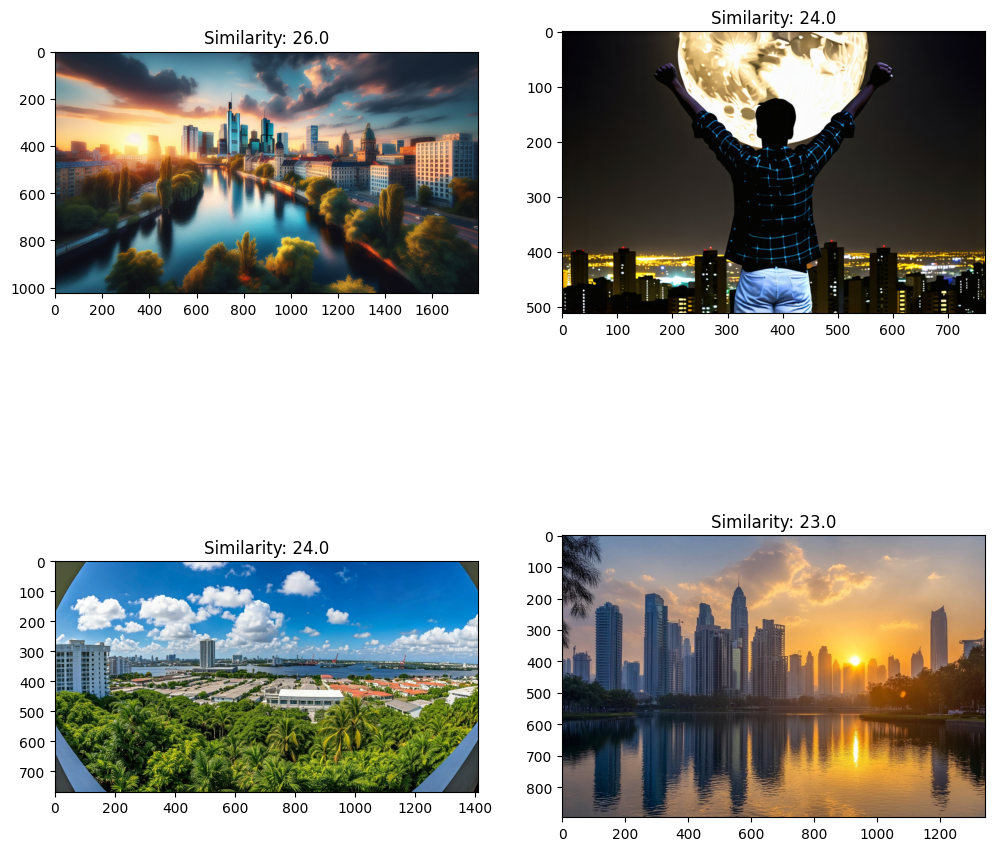

In [62]:
plot_images_by_side_(top_results)

In [24]:
def run(query):    
    query_caption = query
    # Print the original query text
    print("Query: {}".format(query_caption))
    # Run the similarity search
    top_images = get_top_N_images(query_caption, image_data_df)
    # Plot the recommended images
    plot_images_by_side(top_images)

    return top_images

Query: A city under construction


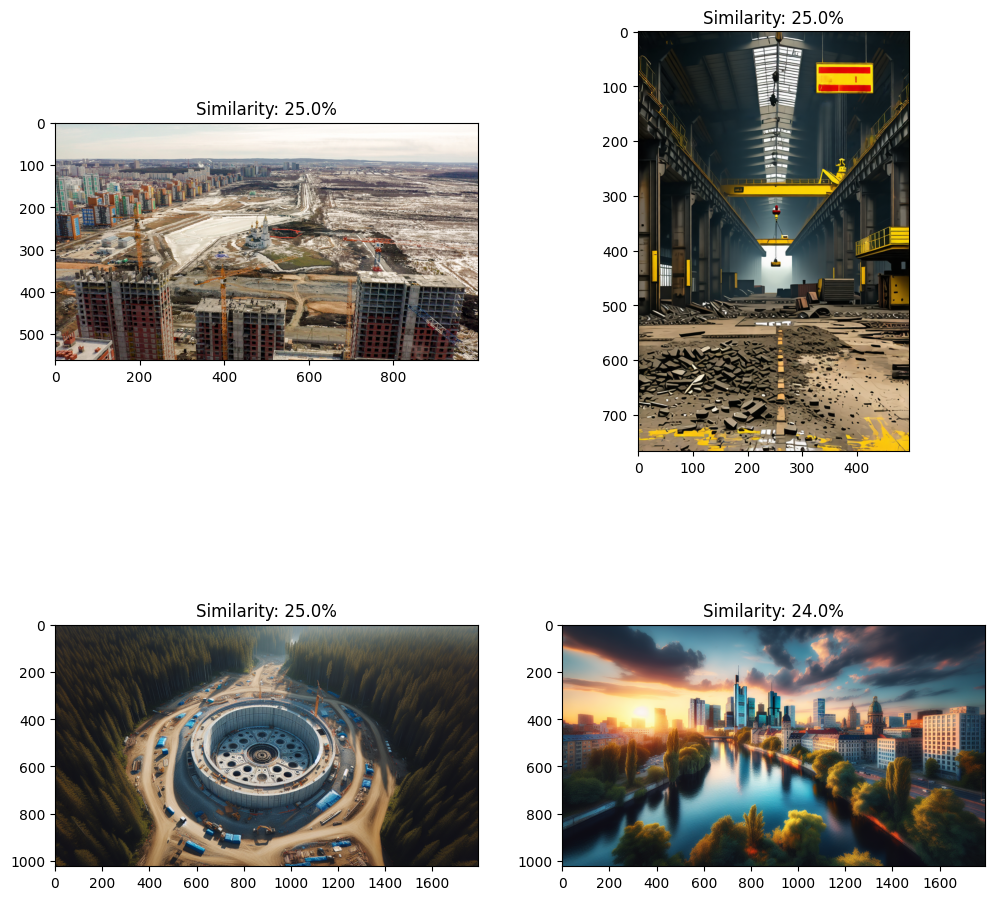

In [25]:
top_images = run("A city under construction")

In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration


def get_blip_model_info(model_ID, device):
# Save the model to device
	model = BlipForConditionalGeneration.from_pretrained(model_ID)
 	# Get the processor
	processor = BlipProcessor.from_pretrained(model_ID)
    # Return model, processor & tokenizer
	return model, processor
# Set the device
device = "cuda" if torch.cuda.is_available() else "cpu"
# Define the model ID
model_ID = "Salesforce/blip-image-captioning-base"
# Get model, processor & tokenizer
blip_model, blip_processor = get_blip_model_info(model_ID, device)

In [27]:
def generate_caption(top_images):
    index_values = list(top_images.index.values)
    list_images = [top_images.iloc[idx].image for idx in index_values]
    captions = []
    for img in list_images:
        inputs = blip_processor(img, return_tensors="pt")
        output = blip_model.generate(**inputs)
        caption = blip_processor.decode(output[0], skip_special_tokens=True)
        captions.append(caption)
    return captions

out = generate_caption(top_images)

In [28]:
print(out)

['a large city', 'a scene of a factory', 'a large circular structure in the middle of a forest', 'a city with a river and a bridge']


In [1]:
from transformers import AutoProcessor, BarkModel

processor = AutoProcessor.from_pretrained("suno/bark")
model = BarkModel.from_pretrained("suno/bark")

voice_preset = "v2/en_speaker_6"

inputs = processor("Hello, my dog is cute", voice_preset=voice_preset)

audio_array = model.generate(**inputs)
audio_array = audio_array.cpu().numpy().squeeze()

/home/fisokuhle/Desktop/multi-modal_image_retrieval_system/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/fisokuhle/Desktop/multi-modal_image_retrieval_system/.venv/lib/python3.10/site-packages/transformers/models/encodec/modeling_encodec.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer("padding_total", torch.tensor(kernel_size - stride, dtype=torch.int64), persistent=False)
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end genera

In [2]:
from scipy.io.wavfile import write as write_wav

# save audio to disk, but first take the sample rate from the model config
sample_rate = model.generation_config.sample_rate
write_wav("bark_generation.wav", sample_rate, audio_array)

In [3]:
from IPython.display import Audio
Audio(audio_array, rate=sample_rate)